In [1]:
from scipy.io import loadmat
lfp_buz_features = loadmat('lfp_buz_features_rgs14.mat')

## EEG Bands and EMG Like Signals

In [2]:
import pandas as pd
import numpy as np

lfp_matrix = np.array(lfp_buz_features['lfpFeatures'])

numColumns = len(lfp_matrix[0])

delta_pfc_df = pd.DataFrame(lfp_matrix[:, 0], columns=["DeltaPFC"])
theta_hpc_df = pd.DataFrame(lfp_matrix[:, 1], columns=["ThetaHPC"])
beta_pfc_df = pd.DataFrame(lfp_matrix[:, 2], columns=["BetaPFC"])
gamma_hpc_df = pd.DataFrame(lfp_matrix[:, 3], columns=["GammaHPC"])
emg_like_df = pd.DataFrame(lfp_matrix[:, 4], columns=["EMGLike"])

delta_pfc_by_theta_hpc_norm = loadmat('DeltaPFCThetaHPCRatioNorm.mat')['DeltaBandPFCByThetaBandHPCNorm'].flatten()

epsilon_value = 0.001
timesteps = 10542

In [3]:
delta_pfc = delta_pfc_df['DeltaPFC'].values
theta_hpc  = theta_hpc_df['ThetaHPC'].values

delta_pfc = np.where(delta_pfc == 0, epsilon_value, delta_pfc)
theta_hpc = np.where(theta_hpc == 0, epsilon_value, theta_hpc)

emg_like = emg_like_df.EMGLike.values
emg_like = np.where(emg_like == 0, epsilon_value, emg_like)

## Bands
- Nx4 data array, where N is the number of epochs, and columns refer to Delta PFC, Theta HPC, Delta/Theta and EMG

In [4]:
rgs_14_bands = np.column_stack([
    delta_pfc, 
    theta_hpc, 
    delta_pfc_by_theta_hpc_norm, 
    emg_like, 
])

In [5]:
rgs_14_bands

array([[1.49774889e-01, 1.04810707e-01, 1.58042515e-03, 9.34930027e-01],
       [1.57636173e-01, 1.12688039e-01, 1.54710091e-03, 9.29340661e-01],
       [1.65090828e-01, 1.20951275e-01, 1.50956935e-03, 9.16708231e-01],
       ...,
       [3.87527419e-01, 5.56956794e-01, 7.69522827e-04, 9.50666070e-02],
       [4.00657996e-01, 5.19089181e-01, 8.53635395e-04, 8.13251436e-02],
       [4.14554102e-01, 4.81169652e-01, 9.52847866e-04, 7.90314600e-02]])

In [6]:
import matplotlib.pyplot as plt
num_bins = int(np.sqrt(timesteps))

Text(0.5, 1.0, 'Histogram of delta pfc')

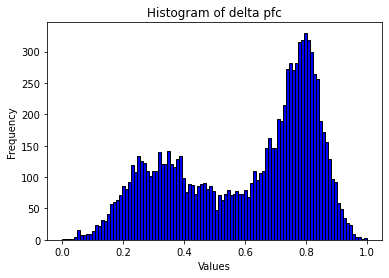

In [7]:
plt.hist(delta_pfc, bins=num_bins, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of delta pfc')

Text(0.5, 1.0, 'Histogram of theta hpc')

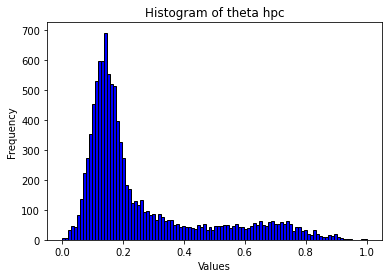

In [8]:
plt.hist(theta_hpc, bins=num_bins, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of theta hpc')

Text(0.5, 1.0, 'Histogram of emg like')

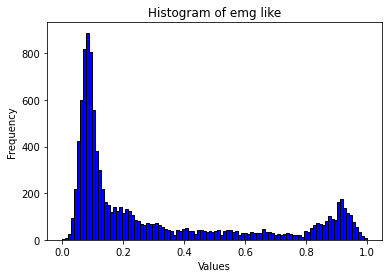

In [9]:
plt.hist(emg_like, bins=num_bins, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of emg like')

Text(0.5, 1.0, 'Histogram of Delta PFC Theta HPC Ratio (Normalized)')

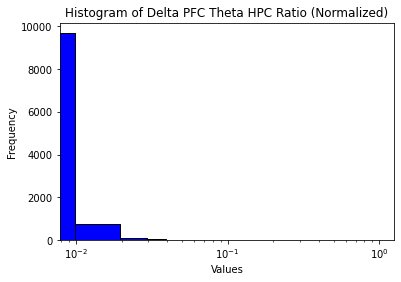

In [10]:
plt.hist(delta_pfc_by_theta_hpc_norm, bins=num_bins, color='blue', edgecolor='black')
plt.xscale('log')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Delta PFC Theta HPC Ratio (Normalized)')

In [11]:
print(f"Total number of values: {len(delta_pfc_by_theta_hpc_norm)}")
print(f"Min: {np.min(delta_pfc_by_theta_hpc_norm)}")
print(f"Max: {np.max(delta_pfc_by_theta_hpc_norm)}")

print(f"Median: {np.median(delta_pfc_by_theta_hpc_norm)}")

print(f"Number of values equal to 0: {len(delta_pfc_by_theta_hpc_norm[delta_pfc_by_theta_hpc_norm == 0])}")
print(f"Number of values greater than 0: {len(delta_pfc_by_theta_hpc_norm[delta_pfc_by_theta_hpc_norm > 0])}")
print(f"Number of values less than 1: {len(delta_pfc_by_theta_hpc_norm[delta_pfc_by_theta_hpc_norm < 1])}")

Total number of values: 10542
Min: 0.0
Max: 1.0
Median: 0.004387702310393605
Number of values equal to 0: 1
Number of values greater than 0: 10541
Number of values less than 1: 10541


## EpochsLinked
- Nx4 data array, where N is the number of epochs, and columns are described as follows:

	- column 1: epoch ID
	- column 2: epoch index (currently not used)
	- column 3: ground truth sleep stage ID, where

				- 1 is associated with wakefulness,
				- 2 is associated with NREM sleep,
				- 3 is associated with REM sleep
	- column 4: the subject ID (used in multi-subject analysis only)

In [12]:
epoch_ids = np.arange(timesteps, dtype=int)

In [13]:
epoch_index = np.arange(timesteps, dtype=int)

In [14]:
states = loadmat('states.mat')

In [15]:
ground_truth_sleep_stage_id = states['downsampledStates'].astype(int)
ground_truth_sleep_stage_id = ground_truth_sleep_stage_id.flatten()

In [16]:
subject_id = np.ones(timesteps, dtype=int)

In [17]:
epochs_linked = np.column_stack([epoch_ids, 
                                 epoch_index, 
                                 ground_truth_sleep_stage_id,
                                 subject_id
                                ])

# epochs_linked.shape

## EpochTime
- Nx3 data array, where N is the number of epochs, and columns are described as follows:

	- column 1: epoch ID
	- column 2: recording mode (i.e. baseline or recovery), where
    
			   - 1 is associated with baseline,
			   - 2 is associated with recovery (after sleep deprivation)
	- column 3: the epoch date-time

In [18]:
recording_mode = np.ones(timesteps).astype('<f8')

In [19]:
start_value = 41137.2918055555
step_size = 8.234392028162487e-05

time = np.arange(start_value, start_value + step_size * timesteps, step_size).astype('<f8')

time = time[:10542]

In [20]:
epoch_time = np.column_stack([epoch_ids.astype('<f8'), recording_mode, time])

In [21]:
np.savez("rgs14.npz", d=rgs_14_bands, epochsLinked=epochs_linked, epochTime=epoch_time)